In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


plt.style.use('ggplot')


In [2]:
data = pd.read_csv('dynamic_api_call_sequence_per_malware_100_0_306.csv')

In [3]:
data.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [4]:
used_data = data.drop(['hash', 'malware'], axis=1)

In [5]:
used_data.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,112,274,158,215,274,158,215,298,76,208,...,117,71,297,135,171,215,35,208,56,71
1,82,208,187,208,172,117,172,117,172,117,...,60,81,240,117,71,297,135,171,215,35
2,16,110,240,117,240,117,240,117,240,117,...,123,65,112,123,65,112,123,65,113,112
3,82,208,187,208,172,117,172,117,172,117,...,215,208,302,208,302,187,208,302,228,302
4,82,240,117,240,117,240,117,240,117,172,...,40,209,260,40,209,260,141,260,141,260


/root/anaconda3/envs/exp1/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='malware', ylabel='count'>

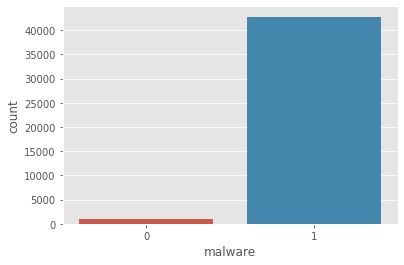

In [6]:
sns.countplot(data['malware'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['malware'], test_size=0.25, 
                                                    shuffle=True, random_state=42)

In [8]:
X_train.shape

(32907, 100)

In [9]:
unique_api_calls = 307

In [10]:
model = Sequential(name="Cnn-Lstm_model")
model.add(Embedding(input_dim=unique_api_calls, output_dim=8,
                    input_length=X_train.shape[1], name='layer_embedding'))
model.add(BatchNormalization())
model.add(Conv1D(filters = 32, kernel_size = 9, padding = 'same', activation = 'relu'))
model.add(MaxPool1D(pool_size = 2))
model.add(LSTM(units=512, return_sequences=False, dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.summary()

Model: "Cnn-Lstm_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 100, 8)            2456      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 8)            32        
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           2336      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 512)               1116160   
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 1,121,497
Trainable params: 1,121,481
Non-trainable params: 16
_________________________________________

In [12]:
optimizer = Adam(lr=.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
%%time
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=512)

Train on 26325 samples, validate on 6582 samples
Epoch 1/30
26325/26325 [==============================] - 90s 3ms/sample - loss: 0.2142 - acc: 0.9750 - val_loss: 0.5420 - val_acc: 0.9771
Epoch 2/30
26325/26325 [==============================] - 72s 3ms/sample - loss: 0.1129 - acc: 0.9755 - val_loss: 0.4998 - val_acc: 0.9771
Epoch 3/30
26325/26325 [==============================] - 70s 3ms/sample - loss: 0.1068 - acc: 0.9755 - val_loss: 0.4878 - val_acc: 0.9771
Epoch 4/30
26325/26325 [==============================] - 71s 3ms/sample - loss: 0.0999 - acc: 0.9755 - val_loss: 0.4636 - val_acc: 0.9771
Epoch 5/30
26325/26325 [==============================] - 71s 3ms/sample - loss: 0.0919 - acc: 0.9755 - val_loss: 0.4228 - val_acc: 0.9771
Epoch 6/30
26325/26325 [==============================] - 71s 3ms/sample - loss: 0.0844 - acc: 0.9755 - val_loss: 0.3316 - val_acc: 0.9771
Epoch 7/30
26325/26325 [==============================] - 71s 3ms/sample - loss: 0.0782 - acc: 0.9763 - val_loss: 0.2

In [14]:
model.save('behavioral-malware-detection-based-on-api-calls_model.h5')

Text(0.5, 0, 'Epochs')

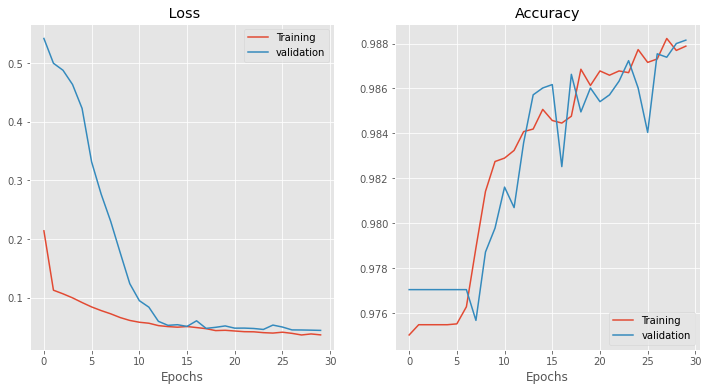

In [15]:
fig, ax = plt.subplots(1,2, figsize=[12,6])
ax[0].plot(history.history["loss"])
ax[0].plot(history.history["val_loss"])
ax[0].set_title(" Loss")
ax[0].legend(("Training", "validation"), loc="upper right")
ax[0].set_xlabel("Epochs")
ax[1].plot(history.history["acc"])
ax[1].plot(history.history["val_acc"])
ax[1].legend(("Training", "validation"), loc="lower right")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")

In [16]:
y_pred = model.predict_classes(X_test)

In [17]:
print("CNN_LSTM model classification report: \n\n {}".format(classification_report(np.array(y_test), y_pred.flatten())))

CNN_LSTM model classification report: 

               precision    recall  f1-score   support

           0       0.85      0.53      0.65       283
           1       0.99      1.00      0.99     10686

    accuracy                           0.99     10969
   macro avg       0.92      0.76      0.82     10969
weighted avg       0.98      0.99      0.98     10969



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

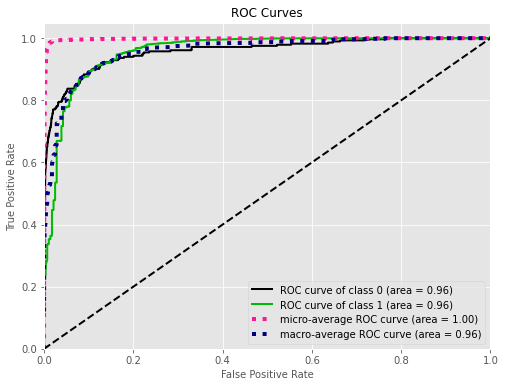

In [18]:
probas = model.predict_proba(X_test, batch_size=64)
probas=np.array([[1-probas[i][0], probas[i][0]] for i in range(len(probas))]).reshape(probas.shape[0], 2)
skplt.metrics.plot_roc(np.array(y_test), probas, figsize=(8, 6))

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

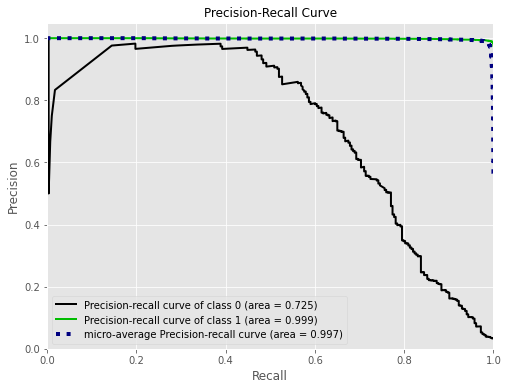

In [19]:
skplt.metrics.plot_precision_recall(np.array(y_test), probas, figsize=(8, 6))

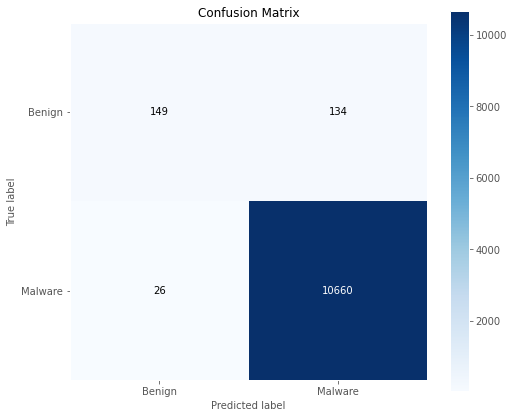

In [20]:
ax=skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8, 7))
tickx=ax.set_xticklabels(['Benign', 'Malware'])
ticky=ax.set_yticklabels(['Benign', 'Malware'])